# Keras Model Grid Example

When training neural networks with `keras` one has to chose a network topology, i.e. the number of hidden layers and units. This choice is not always obvious and one might want to systematically try out a few. The wrapper `keras_grid` helps precisely with that.

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
from keras.models import Sequential
from keras.layers import Dense

import keras_grid

# The Function & The Data Set
Assume we want to learn the function $f:\mathbb{R} \to \mathbb{R}$, $x \mapsto x^2 + \sin(x)$, on the interval $[-1, 1]$.

In [22]:
def f(x):
    return x**2 + np.sin(x)

x_plot = np.linspace(-1, 1, 1000)
y_plot = f(x_plot)

x = np.random.uniform(-1, 1, 250)
y = f(x)

<IPython.core.display.Javascript object>


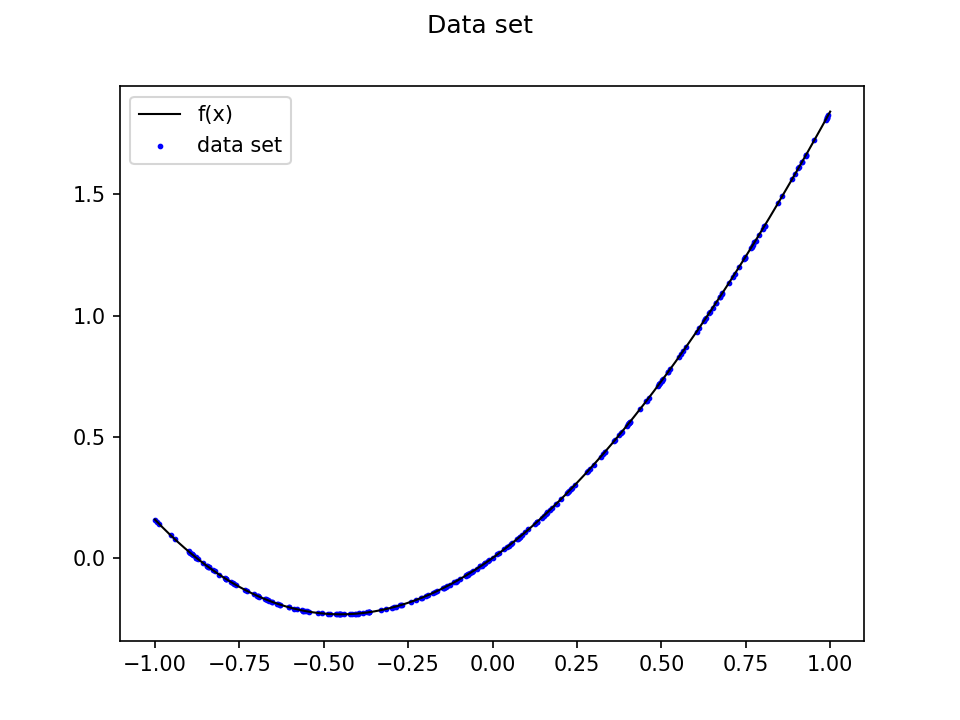

In [23]:
plt.figure()
plt.suptitle('Data set')
plt.plot(x_plot, y_plot, c='k', linewidth=1, label='f(x)')
plt.scatter(x, y, s=3, c='b', label='data set')
plt.legend()
plt.show()

# The Model Grid
We want to learn this nonlinear function $f$ by using a multilayer perceptron. The number of inputs and outputs are given as $n_i = n_o =1$, which we treat as hyperparameters of the model grid. We want to try various numbers of hidden layers, say $\mathcal{N}_L = (1, 2, 3)$ and also various numbers of units, say $\mathcal{N}_u = (64, 128)$.

In [24]:
# first step is to create a class for this grid of multilayer perceptrons

class MlpGrid(keras_grid.ModelGrid):
    """
    Grid of multilayer perceptrons parameterized by a list for the number of hidden layers 
    and a second list for the number of units. The number of inputs and outputs is stored as a
    hyperparameters.
    """
    
    def _create_model(self, key):
        num_inputs = self.hyperparameter_dict['num_inputs']
        num_outputs = self.hyperparameter_dict['num_outputs']
        num_layers, num_units = self.parameter_dict[key]        
        model = Sequential()
        model.add(Dense(units=num_units, input_shape=(num_inputs,), activation='sigmoid'))
        for layer in range(num_layers):
            model.add(Dense(units=num_units, activation='sigmoid'))
        model.add(Dense(units=num_outputs, activation='linear'))
        return model

In [25]:
# second step is to instantiate this class with the desired parameter lists

range_hidden_layers = np.array([2, 3, 4])
range_units = np.array([64, 128, 256, 512])
mlp_grid = MlpGrid.from_parameter_list(parameter_list = [range_hidden_layers, range_units],
                                       hyperparameter_dict={'num_inputs': 1,
                                                            'num_outputs': 1})


In [26]:
mlp_grid.initialize() # creates all the keras models in the grid

In [27]:
mlp_grid[0,1].summary() # access single model in grids by indices
# this model has range_hidden_layers[0] number of hidden layers and range_units[1] number of units in it

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 129       
Total params: 33,409
Trainable params: 33,409
Non-trainable params: 0
_________________________________________________________________


# Compilation & Training

In [28]:
# mlp_grid can now be used like any keras model

mlp_grid.compile(optimizer='Adam', loss='mse', metrics=['mse', 'mae']) 

# ==> all models in the grid are compiled with consistent settings

In [29]:
history = mlp_grid.fit(x=x, y=y, shuffle=True, validation_split=0.2, epochs=100)

Fitting with key 0_0 
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3485 - mean_squared_error: 0.3485 - mean_absolute_error: 0.4910 - val_loss: 0.3830 - val_mean_squared_error: 0.3830 - val_mean_absolute_error: 0.5519
Epoch 2/100
200/200 [==============================] - 0s 112us/step - loss: 0.3434 - mean_squared_error: 0.3434 - mean_absolute_error: 0.4957 - val_loss: 0.3312 - val_mean_squared_error: 0.3312 - val_mean_absolute_error: 0.4375
Epoch 3/100
200/200 [==============================] - 0s 112us/step - loss: 0.3505 - mean_squared_error: 0.3505 - mean_absolute_error: 0.4680 - val_loss: 0.3508 - val_mean_squared_error: 0.3508 - val_mean_absolute_error: 0.5119
Epoch 4/100
200/200 [==============================] - 0s 102us/step - loss: 0.3598 - mean_squared_error: 0.3598 - mean_absolute_error: 0.5360 - val_loss: 0.3561 - val_mean_squared_error: 0.3561 - val_mean_absolute_error: 0.5210
Epoch 5/100
200/200

200/200 [==============================] - 0s 93us/step - loss: 0.0823 - mean_squared_error: 0.0823 - mean_absolute_error: 0.2509 - val_loss: 0.0874 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2483
Epoch 37/100
200/200 [==============================] - 0s 98us/step - loss: 0.0806 - mean_squared_error: 0.0806 - mean_absolute_error: 0.2415 - val_loss: 0.0881 - val_mean_squared_error: 0.0881 - val_mean_absolute_error: 0.2447
Epoch 38/100
200/200 [==============================] - 0s 93us/step - loss: 0.0809 - mean_squared_error: 0.0809 - mean_absolute_error: 0.2406 - val_loss: 0.0874 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2587
Epoch 39/100
200/200 [==============================] - 0s 112us/step - loss: 0.0821 - mean_squared_error: 0.0821 - mean_absolute_error: 0.2534 - val_loss: 0.0862 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2435
Epoch 40/100
200/200 [==============================] - 0s 88us/step - loss: 0.0808 - mean_squar

Epoch 72/100
200/200 [==============================] - 0s 88us/step - loss: 0.0617 - mean_squared_error: 0.0617 - mean_absolute_error: 0.2087 - val_loss: 0.0635 - val_mean_squared_error: 0.0635 - val_mean_absolute_error: 0.2104
Epoch 73/100
200/200 [==============================] - 0s 102us/step - loss: 0.0594 - mean_squared_error: 0.0594 - mean_absolute_error: 0.2022 - val_loss: 0.0626 - val_mean_squared_error: 0.0626 - val_mean_absolute_error: 0.2141
Epoch 74/100
200/200 [==============================] - 0s 88us/step - loss: 0.0613 - mean_squared_error: 0.0613 - mean_absolute_error: 0.2177 - val_loss: 0.0667 - val_mean_squared_error: 0.0667 - val_mean_absolute_error: 0.2039
Epoch 75/100
200/200 [==============================] - 0s 93us/step - loss: 0.0625 - mean_squared_error: 0.0625 - mean_absolute_error: 0.1982 - val_loss: 0.0619 - val_mean_squared_error: 0.0619 - val_mean_absolute_error: 0.2165
Epoch 76/100
200/200 [==============================] - 0s 88us/step - loss: 0.0617

200/200 [==============================] - 0s 137us/step - loss: 0.3499 - mean_squared_error: 0.3499 - mean_absolute_error: 0.5262 - val_loss: 0.3725 - val_mean_squared_error: 0.3725 - val_mean_absolute_error: 0.5424
Epoch 8/100
200/200 [==============================] - 0s 122us/step - loss: 0.3508 - mean_squared_error: 0.3508 - mean_absolute_error: 0.5249 - val_loss: 0.3337 - val_mean_squared_error: 0.3337 - val_mean_absolute_error: 0.4856
Epoch 9/100
200/200 [==============================] - 0s 102us/step - loss: 0.3404 - mean_squared_error: 0.3404 - mean_absolute_error: 0.4846 - val_loss: 0.3227 - val_mean_squared_error: 0.3227 - val_mean_absolute_error: 0.4512
Epoch 10/100
200/200 [==============================] - 0s 137us/step - loss: 0.3426 - mean_squared_error: 0.3426 - mean_absolute_error: 0.4749 - val_loss: 0.3243 - val_mean_squared_error: 0.3243 - val_mean_absolute_error: 0.4663
Epoch 11/100
200/200 [==============================] - 0s 112us/step - loss: 0.3368 - mean_squ

Epoch 43/100
200/200 [==============================] - 0s 122us/step - loss: 0.1236 - mean_squared_error: 0.1236 - mean_absolute_error: 0.3014 - val_loss: 0.1078 - val_mean_squared_error: 0.1078 - val_mean_absolute_error: 0.2700
Epoch 44/100
200/200 [==============================] - 0s 112us/step - loss: 0.1131 - mean_squared_error: 0.1131 - mean_absolute_error: 0.2636 - val_loss: 0.1013 - val_mean_squared_error: 0.1013 - val_mean_absolute_error: 0.2661
Epoch 45/100
200/200 [==============================] - 0s 107us/step - loss: 0.1186 - mean_squared_error: 0.1186 - mean_absolute_error: 0.3019 - val_loss: 0.0961 - val_mean_squared_error: 0.0961 - val_mean_absolute_error: 0.2617
Epoch 46/100
200/200 [==============================] - 0s 112us/step - loss: 0.1008 - mean_squared_error: 0.1008 - mean_absolute_error: 0.2560 - val_loss: 0.0928 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.2510
Epoch 47/100
200/200 [==============================] - 0s 122us/step - loss: 0.

Epoch 79/100
200/200 [==============================] - 0s 112us/step - loss: 0.0652 - mean_squared_error: 0.0652 - mean_absolute_error: 0.2240 - val_loss: 0.0670 - val_mean_squared_error: 0.0670 - val_mean_absolute_error: 0.2116
Epoch 80/100
200/200 [==============================] - 0s 102us/step - loss: 0.0597 - mean_squared_error: 0.0597 - mean_absolute_error: 0.2070 - val_loss: 0.0649 - val_mean_squared_error: 0.0649 - val_mean_absolute_error: 0.2122
Epoch 81/100
200/200 [==============================] - 0s 107us/step - loss: 0.0600 - mean_squared_error: 0.0600 - mean_absolute_error: 0.2071 - val_loss: 0.0637 - val_mean_squared_error: 0.0637 - val_mean_absolute_error: 0.2172
Epoch 82/100
200/200 [==============================] - 0s 117us/step - loss: 0.0582 - mean_squared_error: 0.0582 - mean_absolute_error: 0.2097 - val_loss: 0.0646 - val_mean_squared_error: 0.0646 - val_mean_absolute_error: 0.2070
Epoch 83/100
200/200 [==============================] - 0s 102us/step - loss: 0.

200/200 [==============================] - 0s 117us/step - loss: 0.3079 - mean_squared_error: 0.3079 - mean_absolute_error: 0.4767 - val_loss: 0.2953 - val_mean_squared_error: 0.2953 - val_mean_absolute_error: 0.3656
Epoch 15/100
200/200 [==============================] - 0s 137us/step - loss: 0.2906 - mean_squared_error: 0.2906 - mean_absolute_error: 0.4242 - val_loss: 0.3235 - val_mean_squared_error: 0.3235 - val_mean_absolute_error: 0.5140
Epoch 16/100
200/200 [==============================] - 0s 132us/step - loss: 0.2707 - mean_squared_error: 0.2707 - mean_absolute_error: 0.4402 - val_loss: 0.2468 - val_mean_squared_error: 0.2468 - val_mean_absolute_error: 0.3496
Epoch 17/100
200/200 [==============================] - 0s 112us/step - loss: 0.2674 - mean_squared_error: 0.2674 - mean_absolute_error: 0.4302 - val_loss: 0.2206 - val_mean_squared_error: 0.2206 - val_mean_absolute_error: 0.3453
Epoch 18/100
200/200 [==============================] - 0s 142us/step - loss: 0.2367 - mean_s

Epoch 50/100
200/200 [==============================] - 0s 132us/step - loss: 0.0766 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2331 - val_loss: 0.0798 - val_mean_squared_error: 0.0798 - val_mean_absolute_error: 0.2489
Epoch 51/100
200/200 [==============================] - 0s 132us/step - loss: 0.0736 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2258 - val_loss: 0.0916 - val_mean_squared_error: 0.0916 - val_mean_absolute_error: 0.2744
Epoch 52/100
200/200 [==============================] - 0s 112us/step - loss: 0.0978 - mean_squared_error: 0.0978 - mean_absolute_error: 0.2587 - val_loss: 0.0810 - val_mean_squared_error: 0.0810 - val_mean_absolute_error: 0.2533
Epoch 53/100
200/200 [==============================] - 0s 127us/step - loss: 0.0856 - mean_squared_error: 0.0856 - mean_absolute_error: 0.2498 - val_loss: 0.0954 - val_mean_squared_error: 0.0954 - val_mean_absolute_error: 0.2805
Epoch 54/100
200/200 [==============================] - 0s 117us/step - loss: 0.

Epoch 86/100
200/200 [==============================] - 0s 112us/step - loss: 0.0480 - mean_squared_error: 0.0480 - mean_absolute_error: 0.1827 - val_loss: 0.0531 - val_mean_squared_error: 0.0531 - val_mean_absolute_error: 0.1885
Epoch 87/100
200/200 [==============================] - 0s 117us/step - loss: 0.0468 - mean_squared_error: 0.0468 - mean_absolute_error: 0.1825 - val_loss: 0.0511 - val_mean_squared_error: 0.0511 - val_mean_absolute_error: 0.1935
Epoch 88/100
200/200 [==============================] - 0s 112us/step - loss: 0.0462 - mean_squared_error: 0.0462 - mean_absolute_error: 0.1827 - val_loss: 0.0505 - val_mean_squared_error: 0.0505 - val_mean_absolute_error: 0.1862
Epoch 89/100
200/200 [==============================] - 0s 122us/step - loss: 0.0464 - mean_squared_error: 0.0464 - mean_absolute_error: 0.1850 - val_loss: 0.0548 - val_mean_squared_error: 0.0548 - val_mean_absolute_error: 0.1809
Epoch 90/100
200/200 [==============================] - 0s 112us/step - loss: 0.

200/200 [==============================] - 0s 190us/step - loss: 0.3051 - mean_squared_error: 0.3051 - mean_absolute_error: 0.4522 - val_loss: 0.2859 - val_mean_squared_error: 0.2859 - val_mean_absolute_error: 0.4280
Epoch 22/100
200/200 [==============================] - 0s 176us/step - loss: 0.2932 - mean_squared_error: 0.2932 - mean_absolute_error: 0.4482 - val_loss: 0.3146 - val_mean_squared_error: 0.3146 - val_mean_absolute_error: 0.4968
Epoch 23/100
200/200 [==============================] - 0s 181us/step - loss: 0.3073 - mean_squared_error: 0.3073 - mean_absolute_error: 0.4812 - val_loss: 0.2657 - val_mean_squared_error: 0.2657 - val_mean_absolute_error: 0.3774
Epoch 24/100
200/200 [==============================] - 0s 176us/step - loss: 0.2757 - mean_squared_error: 0.2757 - mean_absolute_error: 0.4358 - val_loss: 0.2574 - val_mean_squared_error: 0.2574 - val_mean_absolute_error: 0.4266
Epoch 25/100
200/200 [==============================] - 0s 176us/step - loss: 0.2595 - mean_s

Epoch 57/100
200/200 [==============================] - 0s 195us/step - loss: 0.0505 - mean_squared_error: 0.0505 - mean_absolute_error: 0.1904 - val_loss: 0.0640 - val_mean_squared_error: 0.0640 - val_mean_absolute_error: 0.1900
Epoch 58/100
200/200 [==============================] - 0s 181us/step - loss: 0.0532 - mean_squared_error: 0.0532 - mean_absolute_error: 0.1964 - val_loss: 0.0582 - val_mean_squared_error: 0.0582 - val_mean_absolute_error: 0.1874
Epoch 59/100
200/200 [==============================] - 0s 171us/step - loss: 0.0558 - mean_squared_error: 0.0558 - mean_absolute_error: 0.1896 - val_loss: 0.0574 - val_mean_squared_error: 0.0574 - val_mean_absolute_error: 0.2158
Epoch 60/100
200/200 [==============================] - 0s 176us/step - loss: 0.0480 - mean_squared_error: 0.0480 - mean_absolute_error: 0.1822 - val_loss: 0.0501 - val_mean_squared_error: 0.0501 - val_mean_absolute_error: 0.1931
Epoch 61/100
200/200 [==============================] - 0s 181us/step - loss: 0.

Epoch 93/100
200/200 [==============================] - 0s 185us/step - loss: 0.0142 - mean_squared_error: 0.0142 - mean_absolute_error: 0.0897 - val_loss: 0.0182 - val_mean_squared_error: 0.0182 - val_mean_absolute_error: 0.0964
Epoch 94/100
200/200 [==============================] - 0s 181us/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0951 - val_loss: 0.0174 - val_mean_squared_error: 0.0174 - val_mean_absolute_error: 0.0960
Epoch 95/100
200/200 [==============================] - 0s 190us/step - loss: 0.0132 - mean_squared_error: 0.0132 - mean_absolute_error: 0.0887 - val_loss: 0.0153 - val_mean_squared_error: 0.0153 - val_mean_absolute_error: 0.0901
Epoch 96/100
200/200 [==============================] - 0s 176us/step - loss: 0.0120 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0827 - val_loss: 0.0145 - val_mean_squared_error: 0.0145 - val_mean_absolute_error: 0.0899
Epoch 97/100
200/200 [==============================] - 0s 176us/step - loss: 0.

200/200 [==============================] - 0s 107us/step - loss: 0.2778 - mean_squared_error: 0.2778 - mean_absolute_error: 0.4231 - val_loss: 0.2548 - val_mean_squared_error: 0.2548 - val_mean_absolute_error: 0.4050
Epoch 29/100
200/200 [==============================] - 0s 117us/step - loss: 0.2638 - mean_squared_error: 0.2638 - mean_absolute_error: 0.4382 - val_loss: 0.2545 - val_mean_squared_error: 0.2545 - val_mean_absolute_error: 0.4304
Epoch 30/100
200/200 [==============================] - 0s 103us/step - loss: 0.2474 - mean_squared_error: 0.2474 - mean_absolute_error: 0.4295 - val_loss: 0.2209 - val_mean_squared_error: 0.2209 - val_mean_absolute_error: 0.3780
Epoch 31/100
200/200 [==============================] - 0s 102us/step - loss: 0.2199 - mean_squared_error: 0.2199 - mean_absolute_error: 0.3841 - val_loss: 0.1967 - val_mean_squared_error: 0.1967 - val_mean_absolute_error: 0.3461
Epoch 32/100
200/200 [==============================] - 0s 103us/step - loss: 0.1976 - mean_s

Epoch 64/100
200/200 [==============================] - 0s 122us/step - loss: 0.0168 - mean_squared_error: 0.0168 - mean_absolute_error: 0.1028 - val_loss: 0.0199 - val_mean_squared_error: 0.0199 - val_mean_absolute_error: 0.1080
Epoch 65/100
200/200 [==============================] - 0s 122us/step - loss: 0.0162 - mean_squared_error: 0.0162 - mean_absolute_error: 0.0967 - val_loss: 0.0193 - val_mean_squared_error: 0.0193 - val_mean_absolute_error: 0.1054
Epoch 66/100
200/200 [==============================] - 0s 98us/step - loss: 0.0158 - mean_squared_error: 0.0158 - mean_absolute_error: 0.0980 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_mean_absolute_error: 0.1029
Epoch 67/100
200/200 [==============================] - 0s 132us/step - loss: 0.0159 - mean_squared_error: 0.0159 - mean_absolute_error: 0.0961 - val_loss: 0.0186 - val_mean_squared_error: 0.0186 - val_mean_absolute_error: 0.1093
Epoch 68/100
200/200 [==============================] - 0s 122us/step - loss: 0.0

Epoch 100/100
200/200 [==============================] - 0s 112us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0658 - val_loss: 0.0107 - val_mean_squared_error: 0.0107 - val_mean_absolute_error: 0.0784
Fitting with key 1_1 
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 0.5637 - mean_squared_error: 0.5637 - mean_absolute_error: 0.5848 - val_loss: 0.4071 - val_mean_squared_error: 0.4071 - val_mean_absolute_error: 0.4024
Epoch 2/100
200/200 [==============================] - 0s 112us/step - loss: 0.4166 - mean_squared_error: 0.4166 - mean_absolute_error: 0.5145 - val_loss: 0.4454 - val_mean_squared_error: 0.4454 - val_mean_absolute_error: 0.6105
Epoch 3/100
200/200 [==============================] - 0s 127us/step - loss: 0.3799 - mean_squared_error: 0.3799 - mean_absolute_error: 0.5439 - val_loss: 0.3303 - val_mean_squared_error: 0.3303 - val_mean_absolute_error: 0.4570
Epoch 4/100
200/2

200/200 [==============================] - 0s 112us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2250 - val_loss: 0.0715 - val_mean_squared_error: 0.0715 - val_mean_absolute_error: 0.2356
Epoch 36/100
200/200 [==============================] - 0s 137us/step - loss: 0.0641 - mean_squared_error: 0.0641 - mean_absolute_error: 0.2115 - val_loss: 0.0641 - val_mean_squared_error: 0.0641 - val_mean_absolute_error: 0.2201
Epoch 37/100
200/200 [==============================] - 0s 132us/step - loss: 0.0594 - mean_squared_error: 0.0594 - mean_absolute_error: 0.2135 - val_loss: 0.0734 - val_mean_squared_error: 0.0734 - val_mean_absolute_error: 0.1991
Epoch 38/100
200/200 [==============================] - 0s 107us/step - loss: 0.0595 - mean_squared_error: 0.0595 - mean_absolute_error: 0.2025 - val_loss: 0.0566 - val_mean_squared_error: 0.0566 - val_mean_absolute_error: 0.2063
Epoch 39/100
200/200 [==============================] - 0s 117us/step - loss: 0.0514 - mean_s

Epoch 71/100
200/200 [==============================] - 0s 137us/step - loss: 0.0115 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0750 - val_loss: 0.0152 - val_mean_squared_error: 0.0152 - val_mean_absolute_error: 0.1030
Epoch 72/100
200/200 [==============================] - 0s 127us/step - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0832 - val_loss: 0.0132 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0870
Epoch 73/100
200/200 [==============================] - 0s 132us/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0751 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.0867
Epoch 74/100
200/200 [==============================] - 0s 102us/step - loss: 0.0102 - mean_squared_error: 0.0102 - mean_absolute_error: 0.0744 - val_loss: 0.0135 - val_mean_squared_error: 0.0135 - val_mean_absolute_error: 0.0775
Epoch 75/100
200/200 [==============================] - 0s 98us/step - loss: 0.0

200/200 [==============================] - 0s 156us/step - loss: 0.3597 - mean_squared_error: 0.3597 - mean_absolute_error: 0.5001 - val_loss: 0.3643 - val_mean_squared_error: 0.3643 - val_mean_absolute_error: 0.5297
Epoch 7/100
200/200 [==============================] - 0s 181us/step - loss: 0.3563 - mean_squared_error: 0.3563 - mean_absolute_error: 0.4929 - val_loss: 0.3331 - val_mean_squared_error: 0.3331 - val_mean_absolute_error: 0.4768
Epoch 8/100
200/200 [==============================] - 0s 146us/step - loss: 0.3483 - mean_squared_error: 0.3483 - mean_absolute_error: 0.5106 - val_loss: 0.3309 - val_mean_squared_error: 0.3309 - val_mean_absolute_error: 0.4711
Epoch 9/100
200/200 [==============================] - 0s 142us/step - loss: 0.3650 - mean_squared_error: 0.3650 - mean_absolute_error: 0.4994 - val_loss: 0.3547 - val_mean_squared_error: 0.3547 - val_mean_absolute_error: 0.5179
Epoch 10/100
200/200 [==============================] - 0s 161us/step - loss: 0.3391 - mean_squa

Epoch 42/100
200/200 [==============================] - 0s 176us/step - loss: 0.0445 - mean_squared_error: 0.0445 - mean_absolute_error: 0.1712 - val_loss: 0.0451 - val_mean_squared_error: 0.0451 - val_mean_absolute_error: 0.1702
Epoch 43/100
200/200 [==============================] - 0s 137us/step - loss: 0.0477 - mean_squared_error: 0.0477 - mean_absolute_error: 0.1785 - val_loss: 0.0433 - val_mean_squared_error: 0.0433 - val_mean_absolute_error: 0.1662
Epoch 44/100
200/200 [==============================] - 0s 151us/step - loss: 0.0374 - mean_squared_error: 0.0374 - mean_absolute_error: 0.1607 - val_loss: 0.0403 - val_mean_squared_error: 0.0403 - val_mean_absolute_error: 0.1710
Epoch 45/100
200/200 [==============================] - 0s 142us/step - loss: 0.0361 - mean_squared_error: 0.0361 - mean_absolute_error: 0.1631 - val_loss: 0.0401 - val_mean_squared_error: 0.0401 - val_mean_absolute_error: 0.1585
Epoch 46/100
200/200 [==============================] - 0s 146us/step - loss: 0.

Epoch 78/100
200/200 [==============================] - 0s 142us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0584 - val_loss: 0.0086 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0719
Epoch 79/100
200/200 [==============================] - 0s 142us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0680 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0690
Epoch 80/100
200/200 [==============================] - 0s 161us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0621 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0753
Epoch 81/100
200/200 [==============================] - 0s 151us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0629 - val_loss: 0.0096 - val_mean_squared_error: 0.0096 - val_mean_absolute_error: 0.0820
Epoch 82/100
200/200 [==============================] - 0s 142us/step - loss: 0.

200/200 [==============================] - 0s 234us/step - loss: 0.3581 - mean_squared_error: 0.3581 - mean_absolute_error: 0.5313 - val_loss: 0.3275 - val_mean_squared_error: 0.3275 - val_mean_absolute_error: 0.4498
Epoch 14/100
200/200 [==============================] - 0s 249us/step - loss: 0.3522 - mean_squared_error: 0.3522 - mean_absolute_error: 0.4799 - val_loss: 0.3601 - val_mean_squared_error: 0.3601 - val_mean_absolute_error: 0.5257
Epoch 15/100
200/200 [==============================] - 0s 234us/step - loss: 0.3476 - mean_squared_error: 0.3476 - mean_absolute_error: 0.4961 - val_loss: 0.3340 - val_mean_squared_error: 0.3340 - val_mean_absolute_error: 0.4840
Epoch 16/100
200/200 [==============================] - 0s 234us/step - loss: 0.3471 - mean_squared_error: 0.3471 - mean_absolute_error: 0.5077 - val_loss: 0.3346 - val_mean_squared_error: 0.3346 - val_mean_absolute_error: 0.4871
Epoch 17/100
200/200 [==============================] - 0s 224us/step - loss: 0.3391 - mean_s

Epoch 49/100
200/200 [==============================] - 0s 249us/step - loss: 0.0142 - mean_squared_error: 0.0142 - mean_absolute_error: 0.0904 - val_loss: 0.0161 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0875
Epoch 50/100
200/200 [==============================] - 0s 239us/step - loss: 0.0124 - mean_squared_error: 0.0124 - mean_absolute_error: 0.0801 - val_loss: 0.0155 - val_mean_squared_error: 0.0155 - val_mean_absolute_error: 0.0907
Epoch 51/100
200/200 [==============================] - 0s 244us/step - loss: 0.0124 - mean_squared_error: 0.0124 - mean_absolute_error: 0.0870 - val_loss: 0.0147 - val_mean_squared_error: 0.0147 - val_mean_absolute_error: 0.0900
Epoch 52/100
200/200 [==============================] - 0s 234us/step - loss: 0.0130 - mean_squared_error: 0.0130 - mean_absolute_error: 0.0894 - val_loss: 0.0153 - val_mean_squared_error: 0.0153 - val_mean_absolute_error: 0.0824
Epoch 53/100
200/200 [==============================] - 0s 229us/step - loss: 0.

Epoch 85/100
200/200 [==============================] - 0s 244us/step - loss: 0.0060 - mean_squared_error: 0.0060 - mean_absolute_error: 0.0513 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0601
Epoch 86/100
200/200 [==============================] - 0s 234us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0479 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0693
Epoch 87/100
200/200 [==============================] - 0s 234us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0514 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0604
Epoch 88/100
200/200 [==============================] - 0s 244us/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0514 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0616
Epoch 89/100
200/200 [==============================] - 0s 229us/step - loss: 0.

200/200 [==============================] - 0s 137us/step - loss: 0.3452 - mean_squared_error: 0.3452 - mean_absolute_error: 0.4954 - val_loss: 0.3332 - val_mean_squared_error: 0.3332 - val_mean_absolute_error: 0.4717
Epoch 21/100
200/200 [==============================] - 0s 132us/step - loss: 0.3578 - mean_squared_error: 0.3578 - mean_absolute_error: 0.4842 - val_loss: 0.3307 - val_mean_squared_error: 0.3307 - val_mean_absolute_error: 0.4585
Epoch 22/100
200/200 [==============================] - 0s 112us/step - loss: 0.3481 - mean_squared_error: 0.3481 - mean_absolute_error: 0.4904 - val_loss: 0.3429 - val_mean_squared_error: 0.3429 - val_mean_absolute_error: 0.4958
Epoch 23/100
200/200 [==============================] - 0s 132us/step - loss: 0.3492 - mean_squared_error: 0.3492 - mean_absolute_error: 0.5124 - val_loss: 0.3486 - val_mean_squared_error: 0.3486 - val_mean_absolute_error: 0.5058
Epoch 24/100
200/200 [==============================] - 0s 107us/step - loss: 0.3481 - mean_s

Epoch 56/100
200/200 [==============================] - 0s 142us/step - loss: 0.1102 - mean_squared_error: 0.1102 - mean_absolute_error: 0.2617 - val_loss: 0.0853 - val_mean_squared_error: 0.0853 - val_mean_absolute_error: 0.2171
Epoch 57/100
200/200 [==============================] - 0s 102us/step - loss: 0.0733 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2127 - val_loss: 0.0591 - val_mean_squared_error: 0.0591 - val_mean_absolute_error: 0.1916
Epoch 58/100
200/200 [==============================] - 0s 117us/step - loss: 0.0474 - mean_squared_error: 0.0474 - mean_absolute_error: 0.1694 - val_loss: 0.0390 - val_mean_squared_error: 0.0390 - val_mean_absolute_error: 0.1422
Epoch 59/100
200/200 [==============================] - 0s 112us/step - loss: 0.0311 - mean_squared_error: 0.0311 - mean_absolute_error: 0.1267 - val_loss: 0.0272 - val_mean_squared_error: 0.0272 - val_mean_absolute_error: 0.1228
Epoch 60/100
200/200 [==============================] - 0s 107us/step - loss: 0.

Epoch 92/100
200/200 [==============================] - 0s 102us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0692 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0789
Epoch 93/100
200/200 [==============================] - 0s 127us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0815
Epoch 94/100
200/200 [==============================] - 0s 117us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0674 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0787
Epoch 95/100
200/200 [==============================] - 0s 112us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0710 - val_loss: 0.0100 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0823
Epoch 96/100
200/200 [==============================] - 0s 117us/step - loss: 0.

200/200 [==============================] - 0s 171us/step - loss: 0.2273 - mean_squared_error: 0.2273 - mean_absolute_error: 0.4199 - val_loss: 0.1627 - val_mean_squared_error: 0.1627 - val_mean_absolute_error: 0.2765
Epoch 28/100
200/200 [==============================] - 0s 146us/step - loss: 0.1479 - mean_squared_error: 0.1479 - mean_absolute_error: 0.2830 - val_loss: 0.1746 - val_mean_squared_error: 0.1746 - val_mean_absolute_error: 0.3745
Epoch 29/100
200/200 [==============================] - 0s 137us/step - loss: 0.1175 - mean_squared_error: 0.1175 - mean_absolute_error: 0.2809 - val_loss: 0.1036 - val_mean_squared_error: 0.1036 - val_mean_absolute_error: 0.2221
Epoch 30/100
200/200 [==============================] - 0s 127us/step - loss: 0.0885 - mean_squared_error: 0.0885 - mean_absolute_error: 0.2463 - val_loss: 0.0899 - val_mean_squared_error: 0.0899 - val_mean_absolute_error: 0.2103
Epoch 31/100
200/200 [==============================] - 0s 142us/step - loss: 0.0778 - mean_s

Epoch 63/100
200/200 [==============================] - 0s 166us/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0666 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_mean_absolute_error: 0.0831
Epoch 64/100
200/200 [==============================] - 0s 127us/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0725 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 65/100
200/200 [==============================] - 0s 161us/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0716 - val_loss: 0.0107 - val_mean_squared_error: 0.0107 - val_mean_absolute_error: 0.0764
Epoch 66/100
200/200 [==============================] - 0s 151us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0703 - val_loss: 0.0113 - val_mean_squared_error: 0.0113 - val_mean_absolute_error: 0.0793
Epoch 67/100
200/200 [==============================] - 0s 142us/step - loss: 0.

Epoch 99/100
200/200 [==============================] - 0s 132us/step - loss: 0.0056 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0572 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - val_mean_absolute_error: 0.0579
Epoch 100/100
200/200 [==============================] - 0s 122us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0529 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0632
Fitting with key 2_2 
Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 1s 7ms/step - loss: 0.5912 - mean_squared_error: 0.5912 - mean_absolute_error: 0.5904 - val_loss: 0.4047 - val_mean_squared_error: 0.4047 - val_mean_absolute_error: 0.5742
Epoch 2/100
200/200 [==============================] - 0s 215us/step - loss: 0.4389 - mean_squared_error: 0.4389 - mean_absolute_error: 0.5961 - val_loss: 0.3423 - val_mean_squared_error: 0.3423 - val_mean_absolute_error: 0.4264
Epoch 3/100
200/

200/200 [==============================] - 0s 176us/step - loss: 0.0169 - mean_squared_error: 0.0169 - mean_absolute_error: 0.1061 - val_loss: 0.0154 - val_mean_squared_error: 0.0154 - val_mean_absolute_error: 0.0943
Epoch 35/100
200/200 [==============================] - 0s 181us/step - loss: 0.0116 - mean_squared_error: 0.0116 - mean_absolute_error: 0.0805 - val_loss: 0.0146 - val_mean_squared_error: 0.0146 - val_mean_absolute_error: 0.1003
Epoch 36/100
200/200 [==============================] - 0s 166us/step - loss: 0.0117 - mean_squared_error: 0.0117 - mean_absolute_error: 0.0881 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0880
Epoch 37/100
200/200 [==============================] - 0s 176us/step - loss: 0.0102 - mean_squared_error: 0.0102 - mean_absolute_error: 0.0796 - val_loss: 0.0130 - val_mean_squared_error: 0.0130 - val_mean_absolute_error: 0.0917
Epoch 38/100
200/200 [==============================] - 0s 185us/step - loss: 0.0108 - mean_s

Epoch 70/100
200/200 [==============================] - 0s 205us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0634 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0707
Epoch 71/100
200/200 [==============================] - 0s 176us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0575 - val_loss: 0.0088 - val_mean_squared_error: 0.0088 - val_mean_absolute_error: 0.0651
Epoch 72/100
200/200 [==============================] - 0s 161us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0602 - val_loss: 0.0097 - val_mean_squared_error: 0.0097 - val_mean_absolute_error: 0.0821
Epoch 73/100
200/200 [==============================] - 0s 195us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0610 - val_loss: 0.0086 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0667
Epoch 74/100
200/200 [==============================] - 0s 176us/step - loss: 0.

200/200 [==============================] - 0s 293us/step - loss: 0.3668 - mean_squared_error: 0.3668 - mean_absolute_error: 0.5349 - val_loss: 0.3316 - val_mean_squared_error: 0.3316 - val_mean_absolute_error: 0.4479
Epoch 6/100
200/200 [==============================] - 0s 288us/step - loss: 0.3544 - mean_squared_error: 0.3544 - mean_absolute_error: 0.4707 - val_loss: 0.3699 - val_mean_squared_error: 0.3699 - val_mean_absolute_error: 0.5355
Epoch 7/100
200/200 [==============================] - 0s 278us/step - loss: 0.3634 - mean_squared_error: 0.3634 - mean_absolute_error: 0.5337 - val_loss: 0.3360 - val_mean_squared_error: 0.3360 - val_mean_absolute_error: 0.4794
Epoch 8/100
200/200 [==============================] - 0s 293us/step - loss: 0.3567 - mean_squared_error: 0.3567 - mean_absolute_error: 0.4861 - val_loss: 0.3580 - val_mean_squared_error: 0.3580 - val_mean_absolute_error: 0.5198
Epoch 9/100
200/200 [==============================] - 0s 278us/step - loss: 0.3597 - mean_squar

Epoch 41/100
200/200 [==============================] - 0s 293us/step - loss: 0.0106 - mean_squared_error: 0.0106 - mean_absolute_error: 0.0844 - val_loss: 0.0111 - val_mean_squared_error: 0.0111 - val_mean_absolute_error: 0.0885
Epoch 42/100
200/200 [==============================] - 0s 283us/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0756 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0850
Epoch 43/100
200/200 [==============================] - 0s 298us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0709 - val_loss: 0.0105 - val_mean_squared_error: 0.0105 - val_mean_absolute_error: 0.0834
Epoch 44/100
200/200 [==============================] - 0s 293us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0722 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_mean_absolute_error: 0.0796
Epoch 45/100
200/200 [==============================] - 0s 293us/step - loss: 0.

Epoch 77/100
200/200 [==============================] - 0s 288us/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0778 - val_loss: 0.0107 - val_mean_squared_error: 0.0107 - val_mean_absolute_error: 0.0895
Epoch 78/100
200/200 [==============================] - 0s 293us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0742 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0731
Epoch 79/100
200/200 [==============================] - 0s 303us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0675 - val_loss: 0.0101 - val_mean_squared_error: 0.0101 - val_mean_absolute_error: 0.0807
Epoch 80/100
200/200 [==============================] - 0s 283us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0635 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0805
Epoch 81/100
200/200 [==============================] - 0s 283us/step - loss: 0.

<IPython.core.display.Javascript object>


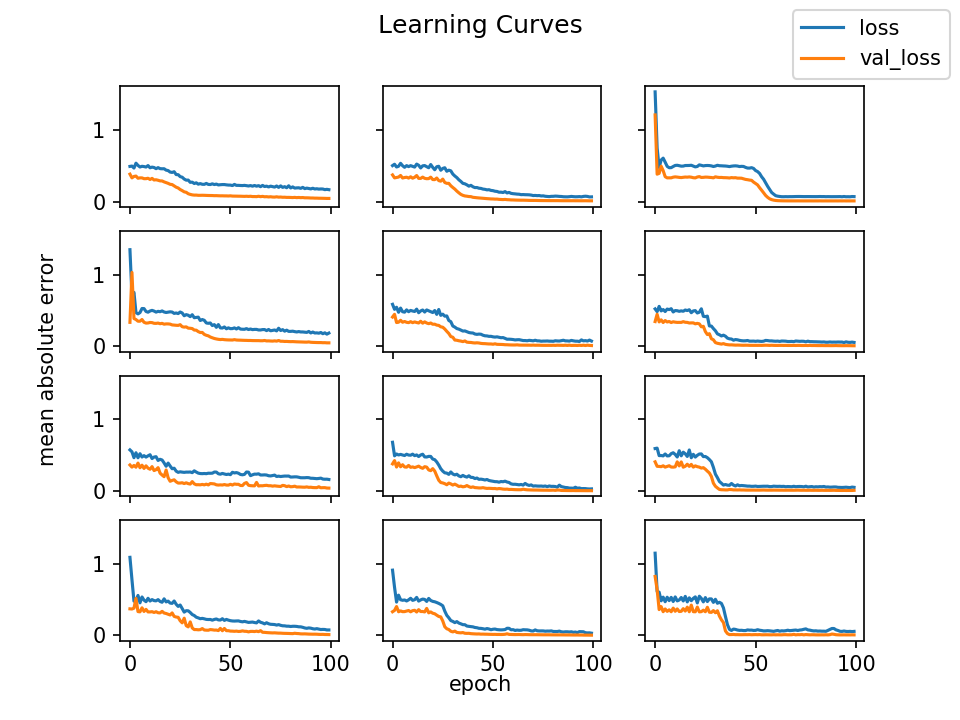

In [30]:
# consistently plot learning curves

fig, axes = plt.subplots(nrows = range_units.shape[0], ncols = range_hidden_layers.shape[0], sharex=True, sharey=True)

fig.suptitle('Learning Curves')

for key in mlp_grid.parameter_dict:
    num_layers_idx, num_units_idx = key
    axes[num_units_idx][num_layers_idx].plot(mlp_grid.history[num_layers_idx, num_units_idx]['mean_absolute_error'], label='loss')
    axes[num_units_idx][num_layers_idx].plot(mlp_grid.history[num_layers_idx, num_units_idx]['val_mean_squared_error'], label='val_loss')
    #axes[num_units_idx][num_layers_idx].set_ylim([0, 1])
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.text(0.5, 0.04, 'epoch', ha='center')
fig.text(0.04, 0.5, 'mean absolute error', va='center', rotation='vertical')
plt.show()

# Saving & Loading
All (hyper-/)parameters of the grid, all the models including weights and training history can be saved in one folder.

In [31]:
data_folder = os.path.join(os.getcwd(), 'model_grid_data')
mlp_grid.save(data_folder)

The entire model grid can be recovered from that folder with a loading factory. Notice that loading even a single keras model can sometimes take some time, so loading a whole grid of them takes even longer.

In [32]:
mlp_grid = MlpGrid.from_disk(data_folder)

Loading model 0_0... Loading model 0_1... Loading model 0_2... Loading model 0_3... Loading model 1_0... Loading model 1_1... Loading model 1_2... Loading model 1_3... Loading model 2_0... Loading model 2_1... Loading model 2_2... Loading model 2_3... 

# Evaluation
All models in the grid can be consistently evaluated on the same data.

In [33]:
evaluation = mlp_grid.evaluate(x, y)

0_0
Evaluating model with key 0_0: 
250/250 [==============================] - 1s 3ms/step
0_1
Evaluating model with key 0_1: 
250/250 [==============================] - 1s 3ms/step
0_2
Evaluating model with key 0_2: 
250/250 [==============================] - 1s 3ms/step
0_3
Evaluating model with key 0_3: 
250/250 [==============================] - 1s 3ms/step
1_0
Evaluating model with key 1_0: 
250/250 [==============================] - 1s 3ms/step
1_1
Evaluating model with key 1_1: 
250/250 [==============================] - 1s 3ms/step
1_2
Evaluating model with key 1_2: 
250/250 [==============================] - 1s 3ms/step
1_3
Evaluating model with key 1_3: 
250/250 [==============================] - 1s 3ms/step
2_0
Evaluating model with key 2_0: 
250/250 [==============================] - 1s 3ms/step
2_1
Evaluating model with key 2_1: 
250/250 [==============================] - 1s 3ms/step
2_2
Evaluating model with key 2_2: 
250/250 [==============================] - 1s 3ms/step

<IPython.core.display.Javascript object>


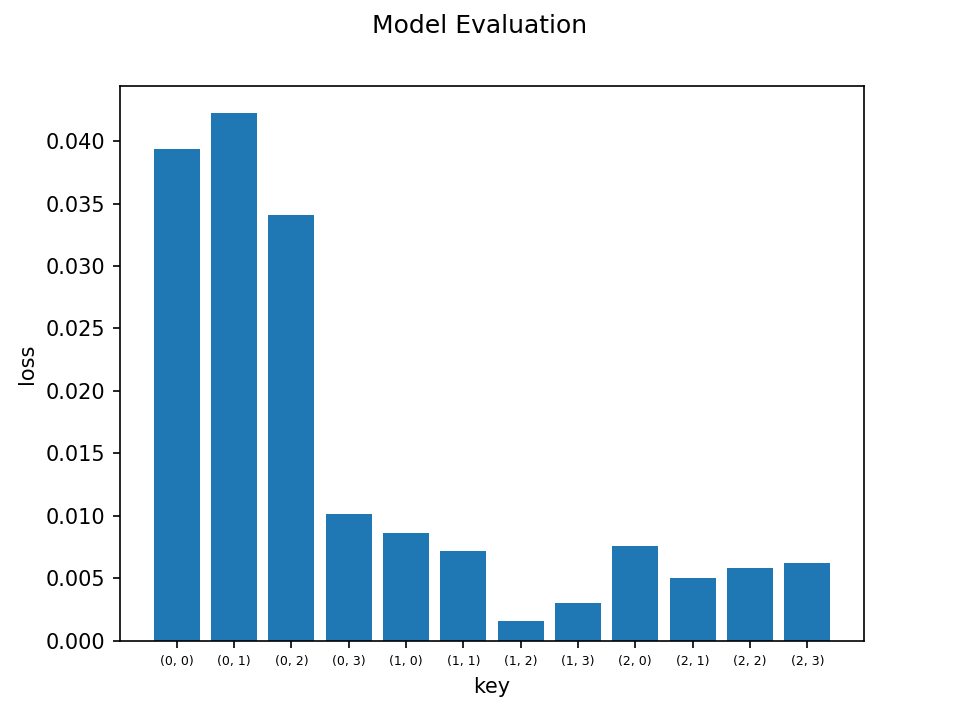

In [34]:
plt.figure()
plt.suptitle('Model Evaluation')
losses = [evaluation[key][0] for key in mlp_grid.parameter_dict]
y_pos = np.arange(len(losses))
plt.bar(y_pos, losses) 
plt.xticks(y_pos, list(mlp_grid.parameter_dict.keys()), size=6)
plt.xlabel('key')
plt.ylabel('loss')
plt.show()

# Predictions
The model grid can also be used to make common predictions. For larger grids and larger models, it is however not recommended to run this on the full grid as the resulting operation might be very memory intensive. Instead, a subset of models is selected.

In [38]:
restrict_to_keys = [(1, 2), (1, 3), (2, 3)]

In [39]:
predictions = mlp_grid.predict(restrict_to_keys, x)

Predicting for model with key 1_2: 
Predicting for model with key 1_3: 
Predicting for model with key 2_3: 


<IPython.core.display.Javascript object>


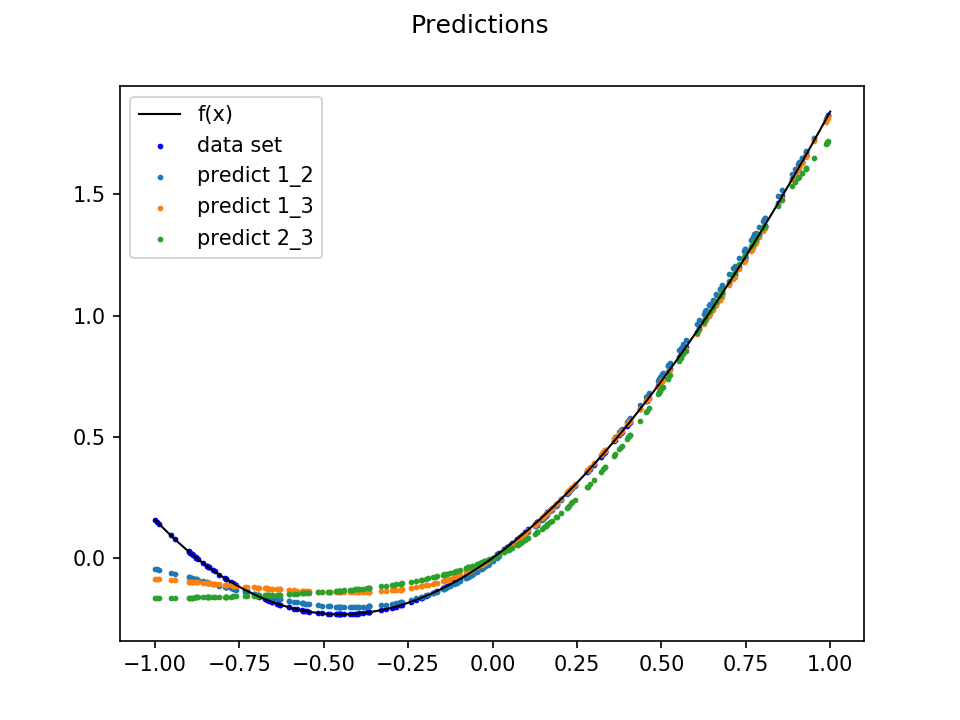

In [40]:
plt.figure()
plt.suptitle('Predictions')
plt.plot(x_plot, y_plot, c='k', linewidth=1, label='f(x)')
plt.scatter(x, y, s=3, c='b', label='data set')
for key in restrict_to_keys:
    plt.scatter(x, predictions[key], s=3, label='predict % s' % mlp_grid.key_to_string(key))
plt.legend()
plt.show()